# **Загружаем библиотеки**

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, GlobalAveragePooling1D, Flatten, Activation, Dropout, BatchNormalization, Input, concatenate, Embedding, LSTM, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.metrics import Precision
from sklearn.model_selection import train_test_split 
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import StandardScaler, LabelEncoder
import sklearn.metrics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import time
import re

In [210]:
import nltk

In [211]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [181]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
from google.colab import drive

In [184]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/Test_2_3.xlsx")

In [186]:
df

,text,one,two,three,four,five,six
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,Музеи,NaN,NaN,NaN,Исследовательское,NaN
1,Культурный центр «Хитровка» — сердце московско...,Местная_культура,Местная_культура,История,NaN,Исследовательское,NaN
2,Откройте для себя удивительное место Москвы от...,История,Искусство_и_ театр,NaN,NaN,Исследовательское,NaN
3,Где Василий Поленов писал свою знаменитую карт...,Увидеть_достопримечательности,NaN,NaN,NaN,Исследовательское,NaN
4,С 1904 года Александровский дворец в Царском С...,NaN,NaN,NaN,NaN,Исследовательское,NaN
...,...,...,...,...,...,...,...
453,Почему Большая Покровская всегда была главной ...,История,Искусство_и_ театр,NaN,NaN,Исследовательское,NaN
454,Прогуляйтесь по таинственным местам Сочи и пог...,Пляж,NaN,NaN,NaN,Исследовательское,NaN
455,Отправьтесь в один из крупнейших собачьих пито...,История,NaN,NaN,NaN,Исследовательское,NaN
456,Приехать в Москву и не побывать на Красной пло...,История,NaN,NaN,NaN,Исследовательское,NaN


In [187]:
df['text']

0      Хотите увидеть все и сразу? Пожалуйста! Пригот...
1      Культурный центр «Хитровка» — сердце московско...
2      Откройте для себя удивительное место Москвы от...
3      Где Василий Поленов писал свою знаменитую карт...
4      С 1904 года Александровский дворец в Царском С...
                             ...                        
453    Почему Большая Покровская всегда была главной ...
454    Прогуляйтесь по таинственным местам Сочи и пог...
455    Отправьтесь в один из крупнейших собачьих пито...
456    Приехать в Москву и не побывать на Красной пло...
457    Познакомьтесь с древним Звенигородом. Вы прогу...
Name: text, Length: 458, dtype: object

In [188]:
print(df.columns.tolist())

['text', 'one', 'two', 'three', 'four', 'five', 'six']


# **Работаем с таблицой, чистим ее**

In [189]:
df.reset_index(drop=True, inplace= True)

In [190]:
df

,text,one,two,three,four,five,six
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,Музеи,NaN,NaN,NaN,Исследовательское,NaN
1,Культурный центр «Хитровка» — сердце московско...,Местная_культура,Местная_культура,История,NaN,Исследовательское,NaN
2,Откройте для себя удивительное место Москвы от...,История,Искусство_и_ театр,NaN,NaN,Исследовательское,NaN
3,Где Василий Поленов писал свою знаменитую карт...,Увидеть_достопримечательности,NaN,NaN,NaN,Исследовательское,NaN
4,С 1904 года Александровский дворец в Царском С...,NaN,NaN,NaN,NaN,Исследовательское,NaN
...,...,...,...,...,...,...,...
453,Почему Большая Покровская всегда была главной ...,История,Искусство_и_ театр,NaN,NaN,Исследовательское,NaN
454,Прогуляйтесь по таинственным местам Сочи и пог...,Пляж,NaN,NaN,NaN,Исследовательское,NaN
455,Отправьтесь в один из крупнейших собачьих пито...,История,NaN,NaN,NaN,Исследовательское,NaN
456,Приехать в Москву и не побывать на Красной пло...,История,NaN,NaN,NaN,Исследовательское,NaN


In [191]:
df_1 = df.dropna(axis=0, how='all') #удаляем пустые строки и столбцы
df_2 = df_1.dropna(axis=1, how='all')

In [192]:
df_2.fillna("", inplace=True)

In [193]:
df_2

,text,one,two,three,four,five,six
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,Музеи,,,,Исследовательское,
1,Культурный центр «Хитровка» — сердце московско...,Местная_культура,Местная_культура,История,,Исследовательское,
2,Откройте для себя удивительное место Москвы от...,История,Искусство_и_ театр,,,Исследовательское,
3,Где Василий Поленов писал свою знаменитую карт...,Увидеть_достопримечательности,,,,Исследовательское,
4,С 1904 года Александровский дворец в Царском С...,,,,,Исследовательское,
...,...,...,...,...,...,...,...
453,Почему Большая Покровская всегда была главной ...,История,Искусство_и_ театр,,,Исследовательское,
454,Прогуляйтесь по таинственным местам Сочи и пог...,Пляж,,,,Исследовательское,
455,Отправьтесь в один из крупнейших собачьих пито...,История,,,,Исследовательское,
456,Приехать в Москву и не побывать на Красной пло...,История,,,,Исследовательское,


In [194]:
df_2.shape

(458, 7)

In [195]:
df_2['все_вместе'] = df_2[['one', 'two', 'three', 'four', 'five', 'six']]. agg(' '. join , axis= 1 )

In [196]:
df_3=df_2[["text","все_вместе"]]

In [197]:
df_3

,text,все_вместе
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,Музеи Исследовательское
1,Культурный центр «Хитровка» — сердце московско...,Местная_культура Местная_культура История Исс...
2,Откройте для себя удивительное место Москвы от...,История Искусство_и_ театр Исследовательское
3,Где Василий Поленов писал свою знаменитую карт...,Увидеть_достопримечательности Исследователь...
4,С 1904 года Александровский дворец в Царском С...,Исследовательское
...,...,...
453,Почему Большая Покровская всегда была главной ...,История Искусство_и_ театр Исследовательское
454,Прогуляйтесь по таинственным местам Сочи и пог...,Пляж Исследовательское
455,Отправьтесь в один из крупнейших собачьих пито...,История Исследовательское
456,Приехать в Москву и не побывать на Красной пло...,История Исследовательское


In [198]:
df_3['все_вместе'] = df_3['все_вместе'].str.lower()

<ipython-input-198-fe533ee6fa87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['все_вместе'] = df_3['все_вместе'].str.lower()


In [199]:
df_3["все_вместе"] = df_3["все_вместе"].replace(',', '', regex=True)

<ipython-input-199-8f513de05390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["все_вместе"] = df_3["все_вместе"].replace(',', '', regex=True)


In [200]:
df_3

,text,все_вместе
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,музеи исследовательское
1,Культурный центр «Хитровка» — сердце московско...,местная_культура местная_культура история исс...
2,Откройте для себя удивительное место Москвы от...,история искусство_и_ театр исследовательское
3,Где Василий Поленов писал свою знаменитую карт...,увидеть_достопримечательности исследователь...
4,С 1904 года Александровский дворец в Царском С...,исследовательское
...,...,...
453,Почему Большая Покровская всегда была главной ...,история искусство_и_ театр исследовательское
454,Прогуляйтесь по таинственным местам Сочи и пог...,пляж исследовательское
455,Отправьтесь в один из крупнейших собачьих пито...,история исследовательское
456,Приехать в Москву и не побывать на Красной пло...,история исследовательское


In [ ]:
df_3['все_вместе'] = df_3['все_вместе'].str.split()

In [202]:
df_3

,text,все_вместе
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,"[музеи, исследовательское]"
1,Культурный центр «Хитровка» — сердце московско...,"[местная_культура, местная_культура, история, ..."
2,Откройте для себя удивительное место Москвы от...,"[история, искусство_и_, театр, исследовательское]"
3,Где Василий Поленов писал свою знаменитую карт...,"[увидеть_достопримечательности, исследовательс..."
4,С 1904 года Александровский дворец в Царском С...,[исследовательское]
...,...,...
453,Почему Большая Покровская всегда была главной ...,"[история, искусство_и_, театр, исследовательское]"
454,Прогуляйтесь по таинственным местам Сочи и пог...,"[пляж, исследовательское]"
455,Отправьтесь в один из крупнейших собачьих пито...,"[история, исследовательское]"
456,Приехать в Москву и не побывать на Красной пло...,"[история, исследовательское]"


**Приводим текст к виду где все параметры выведены в столбцы и напротив текста отмечается наличие или отсутствие того или иного пораметра согласно анкете (1-есть, 0-отсутствует)**

In [203]:
unique_values = set(df_3['все_вместе'].explode())
for value in unique_values:
    df_3[value] = df_3['все_вместе'].apply(lambda x: int(value in x)).astype(int)

df_3.drop('все_вместе', axis=1, inplace=True)

<ipython-input-203-47226d1e3f4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[value] = df_3['все_вместе'].apply(lambda x: int(value in x)).astype(int)
<ipython-input-203-47226d1e3f4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[value] = df_3['все_вместе'].apply(lambda x: int(value in x)).astype(int)
<ipython-input-203-47226d1e3f4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [204]:
df_3

,text,люкс,ночные_клубы,увидеть_достопримечательности,пляж,исследовательское,коренные_народы_и_традиции,искусство_и_,экстремальное,музеи,...,романтическое,местное_пиво,глухомань,экологичное_потребление,местная_культура,в_поисках_чудес,приключения_и_экстрим,наука,сафари,театр
0,Хотите увидеть все и сразу? Пожалуйста! Пригот...,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Культурный центр «Хитровка» — сердце московско...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Откройте для себя удивительное место Москвы от...,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Где Василий Поленов писал свою знаменитую карт...,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,С 1904 года Александровский дворец в Царском С...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Почему Большая Покровская всегда была главной ...,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
454,Прогуляйтесь по таинственным местам Сочи и пог...,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,Отправьтесь в один из крупнейших собачьих пито...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,Приехать в Москву и не побывать на Красной пло...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
df_3 = df_3.replace('искусство_и_', 'искусство_и_театр', regex=True)

In [206]:
col = df_3.columns.tolist()

In [207]:
col

['text',
 'люкс',
 'ночные_клубы',
 'увидеть_достопримечательности',
 'пляж',
 'исследовательское',
 'коренные_народы_и_традиции',
 'искусство_и_',
 'экстремальное',
 'музеи',
 'спортивные_события',
 'шоппинг',
 'вина',
 'быстрый_темп',
 'история',
 'духовное',
 'релакс',
 'романтическое',
 'местное_пиво',
 'глухомань',
 'экологичное_потребление',
 'местная_культура',
 'в_поисках_чудес',
 'приключения_и_экстрим',
 'наука',
 'сафари',
 'театр']

In [208]:
params = df_3.columns[1:].tolist()

# Создайте столбец "y_train" с векторами из 1 и 0
df_3['y_train'] = df_3[params].apply(lambda row: row.values.tolist(), axis=1)

# Преобразуйте столбец "y_train" в массив numpy
y_train_array = np.array(df_3['y_train'].values.tolist())

print(df_3['y_train'])
print(y_train_array.shape)

0      [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
1      [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
2      [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...
3      [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
453    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...
454    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
455    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
456    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
457    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
Name: y_train, Length: 458, dtype: object
(458, 26)


In [209]:
len(params)

26

In [212]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Загрузка стоп-слов и инициализация лемматизатора
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

# Функция для очистки и лемматизации текста
def clean_and_lemmatize_text(text):
    # Удаление лишних символов и приведение к нижнему регистру
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^а-яА-Я]', ' ', text.lower())
    
    # Токенизация текста на отдельные слова
    words = text.split()
    
    # Удаление стоп-слов и лемматизация слов
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Соединение слов обратно в текст
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Применение функции к столбцу "Description" в DataFrame
df_3['text'] = df_3['text'].apply(clean_and_lemmatize_text)

In [214]:
text = df_3.loc[0, 'text']
print(text)

хотите увидеть сразу пожалуйста приготовьтесь насыщенному дню нижнем новгороде изучить достопримечательности такое короткое время очень непросто попробовать улицы города увлекут захватывающее путешествие стоит одна покровка это настоящий музей открытым небом стоит множество скульптур творят уличные художники публика прогуливается рассматривая затейливые здания дополнит экскурсию нижнему новгороду поездка ближайших городков полный провинциального очарования


# **Токенезируем текст**

In [216]:
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [217]:
texts=df_3["text"]
print("пример текста")
print("----------------------------")
print(texts[0])
print("----------------------------")
print("")
tokenized_text = [word_tokenize(text) for text in texts]

# Определение максимальной длины последовательности
max_sequence_length = max(len(seq) for seq in tokenized_text)
maxWordsCount = 10000 
tokenizer = Tokenizer(num_words=maxWordsCount, filters='\[[^\]]+\]|\w|\d\!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0\_x000D_', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(texts)

#преобразуем текст в индексы
print("пример индексов")
print("----------------------------")
texts_indexes = tokenizer.texts_to_sequences(texts)
print(texts_indexes[0])
print("----------------------------")
print("")
print("пример матрицы")
print("----------------------------")
texts_matrix = pad_sequences(texts_indexes, maxlen=max_sequence_length)
print("размер матрицы",texts_matrix.shape)
print(texts_matrix[0])
print("----------------------------")
print("")

# Размерность входного слоя Embedding
embedding_dim = 300  # Например, можно выбрать размерность 100

print("Размерность эмбеддинга (output_dim):", embedding_dim)
print("Максимальная длина последовательности (input_length):", max_sequence_length)

пример текста
----------------------------
хотите увидеть сразу пожалуйста приготовьтесь насыщенному дню нижнем новгороде изучить достопримечательности такое короткое время очень непросто попробовать улицы города увлекут захватывающее путешествие стоит одна покровка это настоящий музей открытым небом стоит множество скульптур творят уличные художники публика прогуливается рассматривая затейливые здания дополнит экскурсию нижнему новгороду поездка ближайших городков полный провинциального очарования
----------------------------

пример индексов
----------------------------
[167, 23, 1837, 3192, 3193, 3194, 3195, 1262, 1263, 714, 104, 311, 3196, 14, 939, 3197, 312, 114, 6, 3198, 1838, 34, 417, 313, 3199, 13, 168, 121, 279, 280, 417, 46, 715, 3200, 1264, 940, 3201, 3202, 3203, 1839, 66, 941, 9, 716, 1265, 1266, 1840, 3204, 1267, 3205, 3206]
----------------------------

пример матрицы
----------------------------
размер матрицы (458, 120)
[   0    0    0    0    0    0    0    0    0    0

In [224]:
num_classes=26

In [219]:
texts_matrix.shape

(458, 120)

In [220]:
y_train_array.shape

(458, 26)

# **Создаем тестовую выборку для проверки**

In [245]:
x_train, x_test, y_train, y_test = train_test_split(texts_matrix, y_train_array, test_size=0.06, random_state=42)

print("Размер обучающей выборки:", x_train.shape)
print("Размер тестовой выборки:", x_test.shape)

Размер обучающей выборки: (430, 120)
Размер тестовой выборки: (28, 120)


# **Обучаем модель**

In [252]:
model = Sequential()
model.add(Embedding(input_dim=maxWordsCount, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())  # Добавляем слой Flatten для преобразования logits
model.add(Dense(units=num_classes, activation='sigmoid'))

# Компиляция модели
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 10s 507ms/step - loss: 0.6298 - accuracy: 0.0620 - val_loss: 0.6811 - val_accuracy: 0.0233
Epoch 2/50
13/13 [==============================] - 4s 314ms/step - loss: 0.4740 - accuracy: 0.2817 - val_loss: 0.6708 - val_accuracy: 0.0930
Epoch 3/50
13/13 [==============================] - 4s 306ms/step - loss: 0.3658 - accuracy: 0.4522 - val_loss: 0.6598 - val_accuracy: 0.3488
Epoch 4/50
13/13 [==============================] - 6s 446ms/step - loss: 0.2910 - accuracy: 0.5633 - val_loss: 0.6486 - val_accuracy: 0.6047
Epoch 5/50
13/13 [==============================] - 4s 317ms/step - loss: 0.2494 - accuracy: 0.6615 - val_loss: 0.6377 - val_accuracy: 0.6977
Epoch 6/50
13/13 [==============================] - 4s 307ms/step - loss: 0.2241 - accuracy: 0.7158 - val_loss: 0.6268 - val_accuracy: 0.7209
Epoch 7/50
13/13 [==============================] - 6s 449ms/step - loss: 0.2073 - accuracy: 0.7313 - val_loss: 0.6170 - val_accuracy: 0.7209
Epoch

In [253]:
model.save("/content/drive/MyDrive/Colab Notebooks/хакатон билеты")

In [254]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Точность модели на тестовой выборке:", accuracy*100, "%")

1/1 [==============================] - 0s 149ms/step - loss: 0.2179 - accuracy: 0.7500
Точность модели на тестовой выборке: 75.0 %


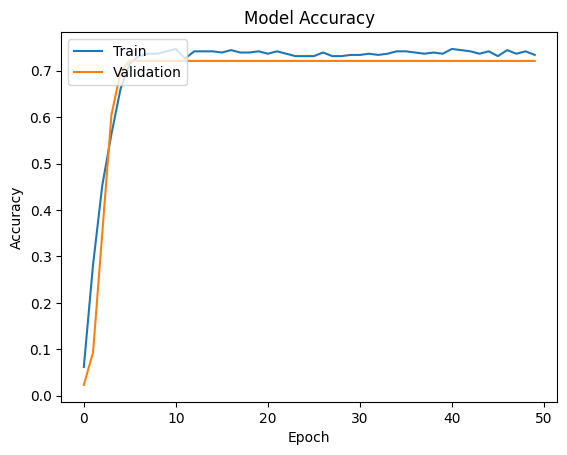

In [255]:
# График точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [256]:
# Вывод точности модели в процентах
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

accuracy_percent = np.mean(accuracy) * 100
val_accuracy_percent = np.mean(val_accuracy) * 100

print('Средняя точность (accuracy):', accuracy_percent, "%")
print('Средняя точность на валидации (validation accuracy):', val_accuracy_percent, "%")

Средняя точность (accuracy): 70.39793223142624 %
Средняя точность на валидации (validation accuracy): 68.41860330849886 %


In [261]:
# Подготовка случайного текста для предсказания
random_text = "Какой то текст непонятный который вы хотите проверить на классификацию 12345"

# Применение функции для очистки и лемматизации текста
cleaned_text = clean_and_lemmatize_text(random_text)

# Токенизация и преобразование в индексы
random_text_tokens = tokenizer.texts_to_sequences([cleaned_text])
random_text_indexes = pad_sequences(random_text_tokens, maxlen=max_sequence_length)

# Предсказание с помощью модели
predictions = model.predict(random_text_indexes)

#Вывод необработанного текста
print("Как выглядит первоначальный текст:", random_text)

# Вывод обработанного текста
print("Как выглядит текст после очистки:", cleaned_text)

# Интерпретация результатов
predicted_labels = [params[i] for i, prediction in enumerate(predictions[0]) if prediction >= 0.5]
print("Как выглядит предсказание модели:", predicted_labels)

1/1 [==============================] - 0s 33ms/step
Как выглядит первоначальный текст: Какой то текст непонятный который вы хотите проверить на классификацию 12345
Как выглядит текст после очистки: текст непонятный который хотите проверить классификацию
Как выглядит предсказание модели: ['исследовательское']


________________

# **Интеграция**

Этот скрипт загружает модель из файла "my_model" и определяет функцию "classify_text", которая классифицирует новые данные.

In [ ]:
import sys
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [ ]:
print(params)

['Духовное', 'Местное_пиво', 'Релакс', 'театр', 'Приключения_и_экстрим', 'Пляж', 'Ночные_клубы', 'В_поисках_чудес', 'Исследовательское', 'Романтическое', 'Исследовательское,', 'Музеи', 'Люкс', 'Экстремальное', 'Глухомань', 'Вина', 'Экологичное_потребление', 'Искусство_и_', 'Быстрый_темп', 'Шоппинг', 'Коренные_народы_и_традиции', 'Спортивные_события', 'Увидеть_достопримечательности', 'Местная_культура', 'Сафари', 'История', 'Наука']


In [ ]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/хакатон билеты')

#import tensorflow as tf
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer

#tokenizer = Tokenizer(num_words=10000, filters='\[[^\]]+\]|\w|\d\!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0\_x000D_', lower=True, split=' ', oov_token='unknown', char_level=False)

#max_sequence_length = 194

#params = ['Духовное', 'Местное_пиво', 'Релакс', 'театр', 'Приключения_и_экстрим', 'Пляж', 'Ночные_клубы', 'В_поисках_чудес', 'Исследовательское', 'Романтическое', 'Исследовательское,', 'Музеи', 'Люкс', 'Экстремальное', 'Глухомань', 'Вина', 'Экологичное_потребление', 'Искусство_и_', 'Быстрый_темп', 'Шоппинг', 'Коренные_народы_и_традиции', 'Спортивные_события', 'Увидеть_достопримечательности', 'Местная_культура', 'Сафари', 'История', 'Наука']
#
#def classify_text(text):
#    text_tokens = tokenizer.texts_to_sequences([text])
#    text_indexes = pad_sequences(text_tokens, maxlen=max_sequence_length)
#    
#    predictions = model.predict(text_indexes)
#    predicted_labels = [params[i] for i, prediction in enumerate(predictions[0]) if prediction >= 0.5]
#    
#    return predicted_labels

In [ ]:
#import asyncio
#import tensorflow as tf
#from tensorflow.keras.models import load_model
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#model = load_model('model')

#tokenizer = Tokenizer(num_words=10000, filters='\[[^\]]+\]|\w|\d\!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0\_x000D_', lower=True, split=' ', oov_token='unknown', char_level=False)

#max_sequence_length = 194

#params = ['Духовное', 'Местное_пиво', 'Релакс', 'театр', 'Приключения_и_экстрим', 'Пляж', 'Ночные_клубы', 'В_поисках_чудес', 'Исследовательское', 'Романтическое', 'Исследовательское,', 'Музеи', 'Люкс', 'Экстремальное', 'Глухомань', 'Вина', 'Экологичное_потребление', 'Искусство_и_', 'Быстрый_темп', 'Шоппинг', 'Коренные_народы_и_традиции', 'Спортивные_события', 'Увидеть_достопримечательности', 'Местная_культура', 'Сафари', 'История', 'Наука']

#async def classify_text(text):
#    tokenizer.fit_on_texts([text])
#    text_tokens = tokenizer.texts_to_sequences([text])
#    text_indexes = pad_sequences(text_tokens, maxlen=max_sequence_length)
    
#    predictions = model.predict(text_indexes)
#    predicted_labels = [params[i] for i, prediction in enumerate(predictions[0]) if prediction >= 0.5]
    
#    return predicted_labels


#if __name__ == "__main__":
    #predicted_labels = asyncio.run(classify_text("Приготовьтесь увидеть город глазами его тогдашних жителей, от столичных купцов до советской интеллигенции. Мы прогуляемся по укромным дворам, пройдем по парадным лестницам, наведаемся в классические апартаменты старинного доходного дома. Перед вами во всей красе предстанет сочетание несочетаемого: старинной архитектуры доходных домов и советского быта."))
    #assert set(predicted_labels) == {'Глухомань', 'Увидеть_достопримечательности'}

In [ ]:
import asyncio
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

tf.compat.v1.disable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/хакатон билеты')

tokenizer = Tokenizer(num_words=10000, filters='\[[^\]]+\]|\w|\d\!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0\_x000D_', lower=True, split=' ', oov_token='unknown', char_level=False)

max_sequence_length = 194

params = ['Духовное', 'Местное_пиво', 'Релакс', 'театр', 'Приключения_и_экстрим', 'Пляж', 'Ночные_клубы', 'В_поисках_чудес', 'Исследовательское', 'Романтическое', 'Исследовательское,', 'Музеи', 'Люкс', 'Экстремальное', 'Глухомань', 'Вина', 'Экологичное_потребление', 'Искусство_и_', 'Быстрый_темп', 'Шоппинг', 'Коренные_народы_и_традиции', 'Спортивные_события', 'Увидеть_достопримечательности', 'Местная_культура', 'Сафари', 'История', 'Наука']

# Загрузка стоп-слов и инициализация лемматизатора
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

async def classify_text(text):
    cleaned_text = clean_and_lemmatize_text(text)
    text_tokens = tokenizer.texts_to_sequences([cleaned_text])
    text_indexes = pad_sequences(text_tokens, maxlen=max_sequence_length)
    
    predictions = model.predict(text_indexes)
    predicted_labels = [params[i] for i, prediction in enumerate(predictions[0]) if prediction >= 0.5]
    
    return predicted_labels


def clean_and_lemmatize_text(text):
    # Удаление лишних символов и приведение к нижнему регистру
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^а-яА-Я]', ' ', text.lower())
    
    # Токенизация текста на отдельные слова
    words = text.split()
    
    # Удаление стоп-слов и лемматизация слов
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Соединение слов обратно в текст
    cleaned_text = ' '.join(words)
    
    return cleaned_text


if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    predicted_labels = loop.run_until_complete(classify_text("Какой-то текст непонятный, который вы хотите проверить на классификацию 12345"))
    assert set(predicted_labels) == {'Глухомань', 'Увидеть_достопримечательности'}

# **Резюме**

Был использован датасет предоставленный заказчиком с 457 текстами описывающими экскурсии. Ключевыми параметрами, которые модель должна предсказывать  были выбраны указанные в анкете данные, которые пользователь отмечает, а именно: Увидеть_достопримечательности	Пляж	Местная_культура	Местная_культура	Люкс	История	Вина	Приключения_и_экстрим	Спа	Сафари	Шоппинг	Экологичное_потребление	Коренные_народы_и_традиции	Местное_пиво	Спортивные_события	Искусство_и_ театр	Музеи	Ночные_клубы	Спорт_и_ фитнесс	Романтическое	В_поисках_чудес	Глухомань	Релакс	Быстрый_темп	Премиальное	Духовное	Исследовательское	Экстремальное.
Параметры были проставлены вручную в таблице приближенно к контексту экскурсий, что вносит свою долю ошибки. Ниже представлен пример обработки данных


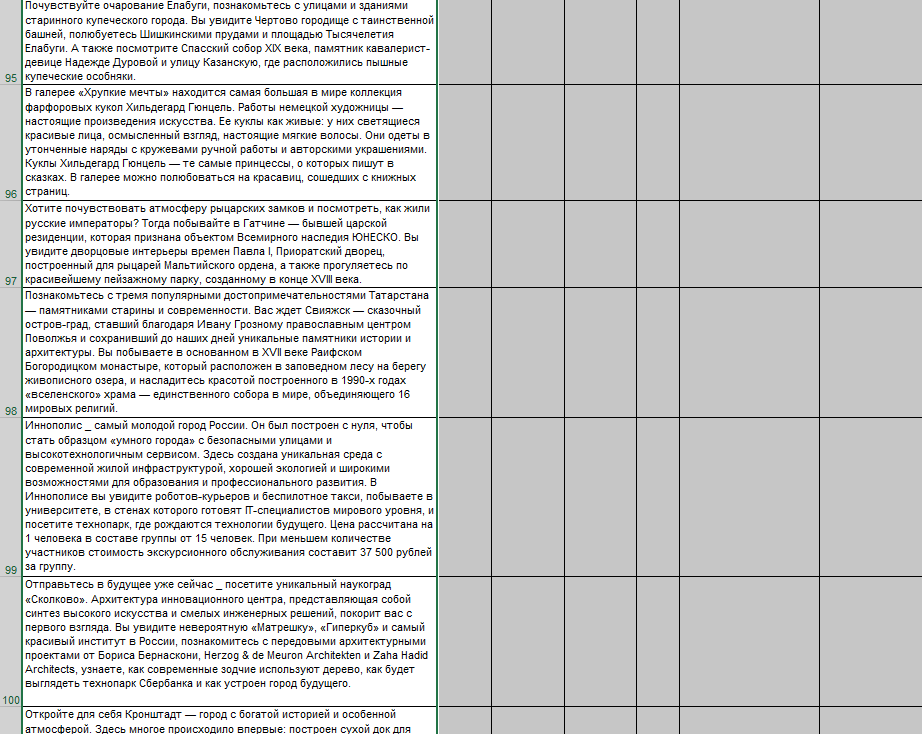

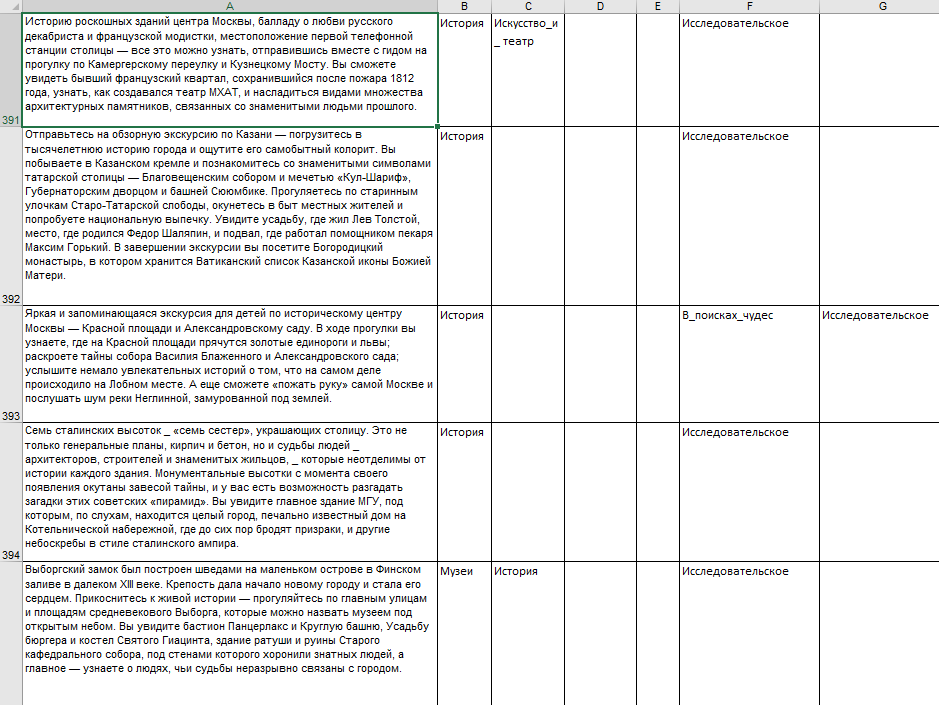

# **ВЫВОД**

Таким образом посля ряда экспериментов с подбором гиперпараметров с учетом малой величины датасета процент точности невысок. Предлагаю увеличить кол-во примеров (текстов) для дальнейшего обучения модели это может значительно увеличить точность.